In [120]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import re
from scipy.stats import chi2_contingency

In [13]:
essays = pd.read_csv('../data/essays.csv', sep='|')

In [11]:
def split_sentences(text):
    regex =  r'(?<=[.!?])\s*(?=(?:[^"]*"[^"]*")*[^"]*$)'  # Expressão regular para separar as sentenças

    sentences = re.split(regex, text)

    return sentences

In [112]:
ths = [v for v in range(60, 100, 5)]

In [113]:

def check_sent(row):
    sentences = split_sentences(row['text'].replace('\n', ''))
    info = {}
    info['essay'] = row['essay']
    sent_lens = []
    for th in ths:
        info[f'{th}'] = 0
    for sent in sentences[:-1]:
        words = nltk.word_tokenize(sent)
        words = [w for w in words if w[0].isalpha()]
        sent_lens.append(len(words))
        for th in ths:
            if len(words) > th:
                info[f'{th}'] += 1
    info['median'] = np.median(sent_lens)
    return info
    
essays_ths = essays.apply(check_sent, axis=1).to_list()

c:\Users\mwuillau\Documents\UFRJ\Correcao-redacoes-ENEM\env\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\mwuillau\Documents\UFRJ\Correcao-redacoes-ENEM\env\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [114]:
essays_df = pd.DataFrame(essays_ths)
essays_df = essays_df.merge(essays, on='essay')

<Axes: xlabel='comp1', ylabel='60'>

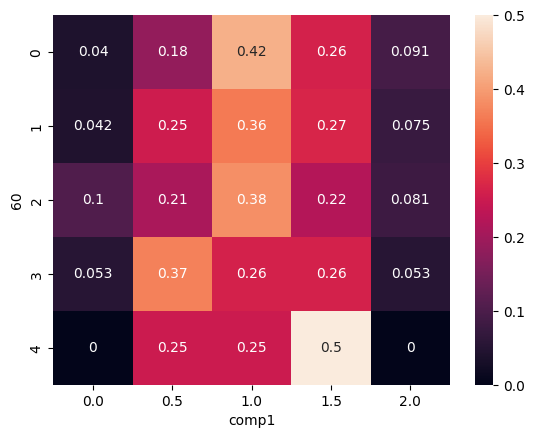

In [128]:
sns.heatmap(pd.crosstab(essays_df['60'], essays_df['comp1'], normalize='index'), annot=True)

In [115]:
for value in ths:
    teste = chi2_contingency(pd.crosstab(essays_df[f'{value}'], essays_df['comp1'])).pvalue
    print(value, teste)

10 1.0201781035513412e-32
15 1.1287023768025923e-38
20 7.823118501684342e-21
25 3.408446300285098e-06
30 0.02677540648516914
35 0.0613651529243639
40 0.9681314682526578
45 0.42980037934332466
50 0.3837127800461792
55 0.2807387041140989
60 0.07099262629375631
65 0.062344095063585875
70 0.000701266254495735
75 0.0024540717721856257
80 0.0007326634097211204
85 0.0023518817473632625
90 0.0014414107742392497
95 0.0068036499810064845
